In [3]:
import xarray as xr
from arviz import InferenceData
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from numpy.random import rand

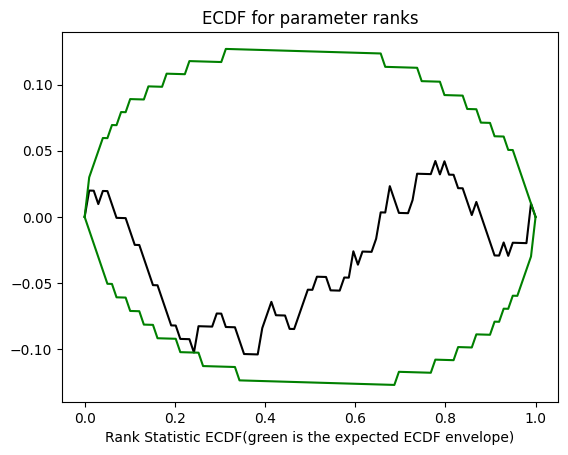

In [42]:
alpha = 0.01
n_prior_draw = 100
fractional_ranks = rand(n_prior_draw)
def rank_ecdf(x):
    return np.sum(fractional_ranks < x) / n_prior_draw

ecdf_xaxis = np.linspace(0, 1-1e-7, n_prior_draw)

ecdf_lower = binom.ppf(alpha / 2, n_prior_draw, ecdf_xaxis) / n_prior_draw
ecdf_upper = binom.ppf(1 - alpha / 2, n_prior_draw, ecdf_xaxis) / n_prior_draw

ecdf_values = np.vectorize(rank_ecdf)(ecdf_xaxis)

ecdf_lower -= ecdf_xaxis
ecdf_upper -= ecdf_xaxis
ecdf_values -= ecdf_xaxis

plt.plot(ecdf_xaxis, ecdf_values, "-", ms=2, color="black")
plt.plot(ecdf_xaxis, ecdf_lower, "-", color="green")
plt.plot(ecdf_xaxis, ecdf_upper, "-", color="green")
#plt.fill_between(ecdf_xaxis, ecdf_lower, ecdf_upper, color="green")
plt.title(f"ECDF for parameter ranks")
plt.xlabel("Rank Statistic ECDF(green is the expected ECDF envelope)")
plt.show()